In [277]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
# Set display option to show all columns
pd.set_option('display.max_columns', None)

# 1.Data Exploration


In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [280]:
path= "/content/drive/MyDrive/3.CreditRisk/1.0322LoanData.csv"
df= pd.read_csv(path, low_memory=False)

In [281]:
df.head()

,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,Education,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,LoanCancelled,PreviousEarlyRepaymentsBeforeLoan
0,D8EBF360-104C-420F-BEC9-000924E6EFC7,3015853,2022-09-09 12:27:01,2022-09-09 15:27:01,11.0,0.0,88.0,False,2022-09-09 15:15:03,2022-09-09,2025-10-27,2022-10-07,2027-09-07,2025-10-27,12,6,4.0,1,27,1.0,EE,3189.0,3189.0,35.48,60,115.34,3.0,UpTo5Years,-1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,0,0.00,0,0.00,0.00,7,True,NaN,472.26,2024-05-03,NaN,NaN,NaN,NaN,0.106489,0.664726,0.136812,0.160200,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024-05-03 15:39:33.017000000,6.0,D,Current,False,NaN,8-15,M,NaN,NaN,1000.0,916.03,1456.1300,NaN,NaN,2272.97,0.000,1.0,3402.0,1161.57,0.0,NaN,NaN,2024-05-27,6.0,23.0,2023-11-30,NaN,NaN,NaN,NaN,NaN
1,C1A98DDA-5E20-429C-BBFF-0009A05354E0,3743447,2023-05-19 11:04:33,2023-05-19 14:04:33,0.0,0.0,0.0,False,2023-05-19 14:03:54,2023-05-19,2033-06-27,2023-06-05,2028-05-03,2033-06-27,23,4,4.0,4,35,1.0,FI,4146.0,4146.0,19.86,60,108.17,5.0,UpTo5Years,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3100.0,0,0.00,0,0.00,0.00,3,True,NaN,268.29,2024-01-26,87.0,2024-02-26,87.0,2024-02-26,0.030048,0.760044,0.138239,0.039534,NaN,37.54,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024-04-29 04:04:27.700000000,0.0,B,Late,True,61-90,61-90,M,NaN,3,NaN,272.34,493.8575,NaN,NaN,3873.66,176.719,1.0,518.0,525.21,0.0,NaN,NaN,2024-05-27,11.0,120.0,2023-07-20,NaN,NaN,91-120,NaN,NaN
2,9B0B252E-45B9-4172-8E2D-0014A8F18117,4335414,2024-02-03 14:43:32,2024-02-03 16:43:32,0.0,0.0,0.0,False,2024-02-03 16:41:51,2024-02-03,2025-05-07,2024-02-23,2029-01-23,2025-05-07,17,6,4.0,1,23,0.0,EE,531.0,531.0,19.52,60,15.25,5.0,UpTo5Years,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1700.0,0,0.00,0,0.00,0.00,23,True,NaN,39.87,2024-05-23,NaN,NaN,NaN,NaN,0.043995,0.714607,0.132462,0.061565,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024-05-12 18:45:52.587000000,0.0,B,Current,False,NaN,16-30,M,NaN,NaN,1000.0,50.99,21.4300,NaN,NaN,480.01,0.000,3.0,1593.0,631.35,0.0,NaN,NaN,2024-07-08,2.0,12.0,2024-05-12,NaN,NaN,NaN,NaN,NaN
3,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,2016-03-23 16:07:19,970.0,1150.0,5.0,False,2016-03-17 12:39:22,2016-03-23,2023-05-31,2016-05-12,2021-04-12,2020-06-26,17,4,4.0,1,53,1.0,EE,2125.0,2125.0,20.97,60,62.05,4.0,MoreThan5Years,1.0,1.0,0.0,301.0,0.0,53.0,0.0,0.0,0.0,354.0,8,485.09

In [282]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400170 entries, 0 to 400169
Data columns (total 97 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   LoanId                                  400170 non-null  object 
 1   LoanNumber                              400170 non-null  int64  
 2   ListedOnUTC                             400170 non-null  object 
 3   BiddingStartedOn                        400170 non-null  object 
 4   BidsPortfolioManager                    400170 non-null  float64
 5   BidsApi                                 400170 non-null  float64
 6   BidsManual                              400170 non-null  float64
 7   NewCreditCustomer                       400170 non-null  bool   
 8   LoanApplicationStartedDate              400170 non-null  object 
 9   LoanDate                                400170 non-null  object 
 10  ContractEndDate                         1030

# 2. Data Cleaning

In [283]:
# Convert LoanDate to datetime and check the valid date range
df['LoanDate'] = pd.to_datetime(df['LoanDate'], errors='coerce')

# Print the earliest and latest loan dates
min_date = df['LoanDate'].min()
max_date = df['LoanDate'].max()

print(f"Earliest LoanDate: {min_date.date()}")
print(f"Latest LoanDate: {max_date.date()}")



Earliest LoanDate: 2009-02-28
Latest LoanDate: 2024-05-24


# 2.1 Filter Female Borrowers

In [284]:
# Keep only female records (Gender = 1)
df = df[df['Gender'] == 1].copy()

print(f"Remaining records where Gender = 1: {len(df):,}")


Remaining records where Gender = 1: 159,545


# 2.2 Target Variable

Filter out "Current" status records

check the value counts

In [285]:
# Summarize loan status by count, percentage, and total amount
status_summary = (
    df.groupby('Status', as_index=False)
      .agg(Frequency=('Status', 'count'), Amount=('Amount', 'sum'))
)

# Calculate share of records and total amount
status_summary['Percent'] = status_summary['Frequency'] / status_summary['Frequency'].sum()
status_summary['AmountPercent'] = status_summary['Amount'] / status_summary['Amount'].sum()

# Add total row
total = pd.DataFrame({
    'Status': ['Total'],
    'Frequency': [status_summary['Frequency'].sum()],
    'Percent': [1.0],
    'Amount': [status_summary['Amount'].sum()],
    'AmountPercent': [1.0]
})
status_summary = pd.concat([status_summary, total], ignore_index=True)

# Format for display
status_summary['Percent'] = status_summary['Percent'].map('{:.2%}'.format)
status_summary['AmountPercent'] = status_summary['AmountPercent'].map('{:.2%}'.format)
status_summary['Amount'] = status_summary['Amount'].map('{:,.0f}'.format)

print("\nLoan Status Summary")
print(status_summary.to_string(index=False))



Loan Status Summary
 Status  Frequency      Amount Percent AmountPercent
Current      63650 155,361,178  39.89%        38.86%
   Late      36696 107,982,415  23.00%        27.01%
 Repaid      59199 136,471,121  37.10%        34.13%
  Total     159545 399,814,714 100.00%       100.00%


In [286]:
df = df[df['Status'] != 'Current']
df['LoanDefaulted'] = df['DefaultDate'].notna().astype(int)

Remove ongoing loans and create a new column LoanDefaulted, where 1 indicates a defaulted loan and 0 indicates a fully repaid loan.

In [287]:
df['LoanDefaulted'].value_counts()


,count
LoanDefaulted,
0,57432
1,38463


# 2.3 Default Trend Over Time

In [288]:
df['LoanDate'] = pd.to_datetime(df['LoanDate'], format='ISO8601')

Original: 95,895  |  Valid after cleaning: 95,114  |  Removed: 781

Annual Default Rate and Volume
     DefaultRate  LoanVolume
Year                        
2009       40.6%         357
2010       36.0%         559
2011       26.7%         206
2012       24.7%         182
2013       33.4%        1170
2014       52.9%        3164
2015       61.5%        3249
2016       58.6%        3990
2017       58.0%        3473
2018       60.5%        3053
2019       56.0%       14273
2020       45.6%        9953
2021       38.9%       17412
2022       33.7%       17037
2023       18.1%       14759
2024        1.2%        2277


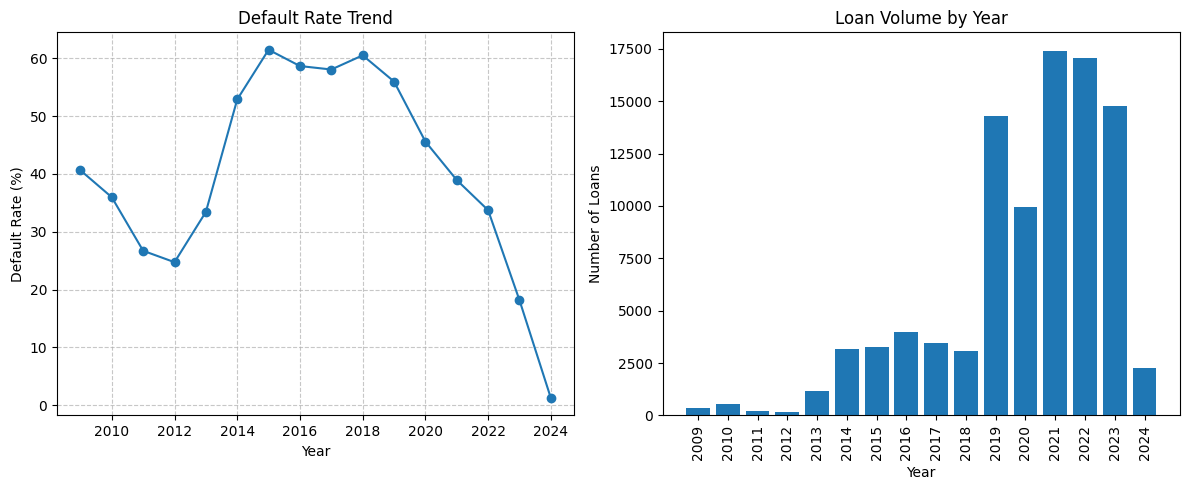


Kendall tau: -0.150, p value: 0.4503


In [289]:
# Parse dates, drop invalid rows
df['LoanDate'] = pd.to_datetime(df['LoanDate'], errors='coerce')
orig_n = len(df)
df = df.dropna(subset=['LoanDate'])
valid_n = len(df)
print(f"Original: {orig_n:,}  |  Valid after cleaning: {valid_n:,}  |  Removed: {orig_n - valid_n:,}\n")

# Yearly default rate and volume
yearly = (
    df.assign(Year=df['LoanDate'].dt.year)
      .groupby('Year')['LoanDefaulted']
      .agg(DefaultRate='mean', LoanVolume='count')
      .sort_index()
)

# Neat table
tbl = yearly.copy()
tbl['DefaultRate'] = (tbl['DefaultRate']*100).map(lambda x: f"{x:.1f}%")
print("Annual Default Rate and Volume")
print(tbl.to_string())

# Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(yearly.index, yearly['DefaultRate']*100, marker='o')
plt.title('Default Rate Trend')
plt.ylabel('Default Rate (%)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.bar(yearly.index.astype(str), yearly['LoanVolume'])
plt.title('Loan Volume by Year')
plt.ylabel('Number of Loans')
plt.xlabel('Year')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Simple trend test
if len(yearly) > 1:
    from scipy.stats import kendalltau
    tau, p = kendalltau(yearly.index, yearly['DefaultRate'])
    print(f"\nKendall tau: {tau:.3f}, p value: {p:.4f}")
else:
    print("\nNot enough years for a trend test.")


In [290]:
# Parse dates and drop invalid ones
df['LoanDate'] = pd.to_datetime(df['LoanDate'], errors='coerce')

# Keep loans before 2021-05-24
df = df[df['LoanDate'] < '2021-05-24'].reset_index(drop=True)

# Quick check
print(f"Records after filter: {len(df):,}")
print(f"Date range: {df['LoanDate'].min().date()} → {df['LoanDate'].max().date()}")


Records after filter: 48,435
Date range: 2009-03-03 → 2021-05-23


In [291]:
df['LoanDefaulted'].value_counts()

,count
LoanDefaulted,
1,25280
0,23155


# 2.4 Data Spliting

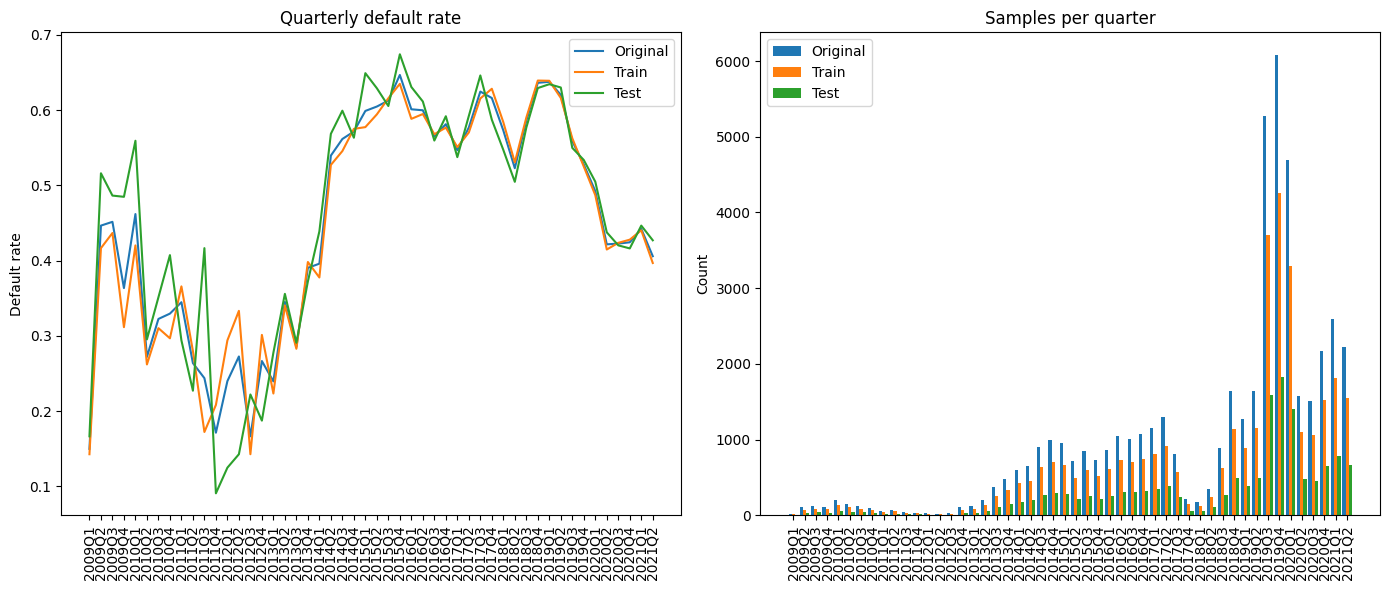

T test p value: 0.0376

Quarterly default rate head:
year_quarter  Original    Train     Test
      2009Q1  0.150000 0.142857 0.166667
      2009Q2  0.446602 0.416667 0.516129
      2009Q3  0.451613 0.436782 0.486486
      2009Q4  0.363636 0.311688 0.484848
      2010Q1  0.461929 0.420290 0.559322
      2010Q2  0.272109 0.262136 0.295455
      2010Q3  0.322581 0.310345 0.351351
      2010Q4  0.329670 0.296875 0.407407
      2011Q1  0.344828 0.365854 0.294118
      2011Q2  0.263889 0.280000 0.227273

Global default rate
Original: 52.19%
Train:    51.88%
Test:     52.91%
Abs diff: 1.03%


/tmp/ipython-input-1009883227.py:83: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_.set_index('LoanDate').resample('M')['LoanDefaulted'].mean()


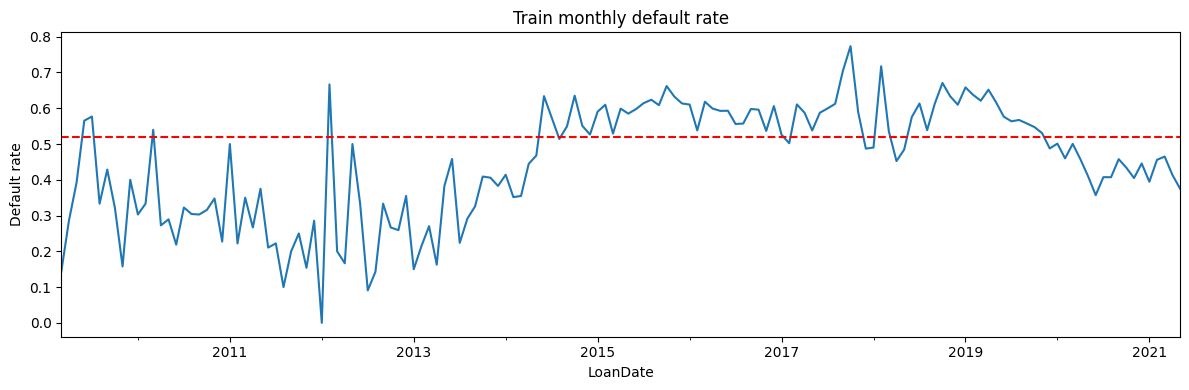

/tmp/ipython-input-1009883227.py:83: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_.set_index('LoanDate').resample('M')['LoanDefaulted'].mean()


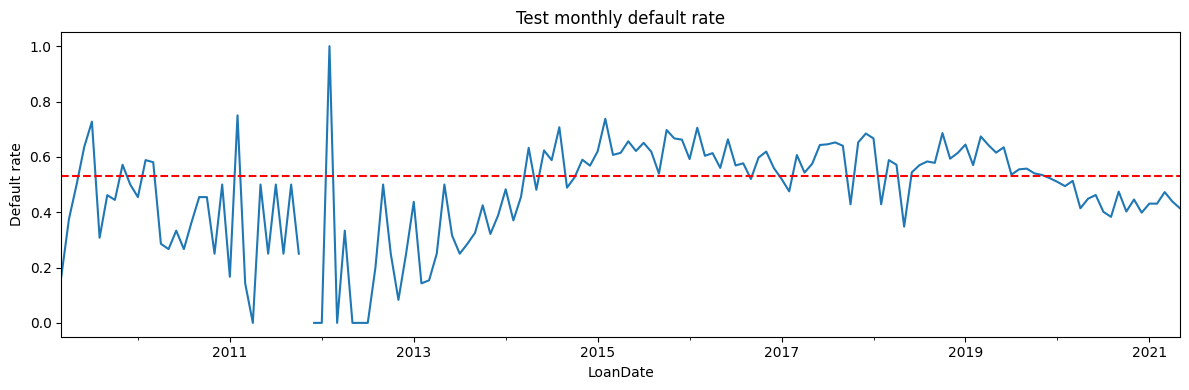

In [292]:
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import ttest_ind

# Time label for stratification
df['LoanDate'] = pd.to_datetime(df['LoanDate'])
df['year_quarter'] = df['LoanDate'].dt.to_period('Q').astype(str)

# Stratified split by quarter
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(sss.split(df, df['year_quarter']))
train_df = df.iloc[train_idx].copy()
test_df = df.iloc[test_idx].copy()

# Check quarterly default rates and counts
def strat_summary(train, test, full):
    rates = (
        pd.DataFrame({
            'Original': full.groupby('year_quarter')['LoanDefaulted'].mean(),
            'Train':    train.groupby('year_quarter')['LoanDefaulted'].mean(),
            'Test':     test.groupby('year_quarter')['LoanDefaulted'].mean(),
        })
        .sort_index()
        .reset_index()
    )

    counts = (
        pd.DataFrame({
            'Original': full['year_quarter'].value_counts().sort_index(),
            'Train':    train['year_quarter'].value_counts().sort_index(),
            'Test':     test['year_quarter'].value_counts().sort_index(),
        })
        .fillna(0)
        .astype(int)
        .reset_index()
        .rename(columns={'index':'year_quarter'})
    )

    # Plots
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(rates['year_quarter'], rates['Original'], label='Original')
    plt.plot(rates['year_quarter'], rates['Train'], label='Train')
    plt.plot(rates['year_quarter'], rates['Test'], label='Test')
    plt.xticks(rotation=90)
    plt.ylabel('Default rate')
    plt.title('Quarterly default rate')
    plt.legend()

    plt.subplot(1, 2, 2)
    x = np.arange(len(counts))
    w = 0.28
    plt.bar(x - w, counts['Original'], width=w, label='Original')
    plt.bar(x,      counts['Train'],   width=w, label='Train')
    plt.bar(x + w,  counts['Test'],    width=w, label='Test')
    plt.xticks(x, counts['year_quarter'], rotation=90)
    plt.ylabel('Count')
    plt.title('Samples per quarter')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Simple global t test
    t, p = ttest_ind(train['LoanDefaulted'], test['LoanDefaulted'])
    print(f"T test p value: {p:.4f}")

    return rates

rates_cmp = strat_summary(train_df, test_df, df)
print("\nQuarterly default rate head:")
print(rates_cmp.head(10).to_string(index=False))

# Global rates
print("\nGlobal default rate")
print(f"Original: {df['LoanDefaulted'].mean():.2%}")
print(f"Train:    {train_df['LoanDefaulted'].mean():.2%}")
print(f"Test:     {test_df['LoanDefaulted'].mean():.2%}")
print(f"Abs diff: {abs(train_df['LoanDefaulted'].mean() - test_df['LoanDefaulted'].mean()):.2%}")

# Quick monthly trend plots
def plot_monthly(df_, title):
    monthly = df_.set_index('LoanDate').resample('M')['LoanDefaulted'].mean()
    plt.figure(figsize=(12, 4))
    monthly.plot()
    plt.axhline(df_['LoanDefaulted'].mean(), color='r', linestyle='--')
    plt.title(f'{title} monthly default rate')
    plt.ylabel('Default rate')
    plt.tight_layout()
    plt.show()

plot_monthly(train_df, 'Train')
plot_monthly(test_df, 'Test')


In [293]:
train_df.to_csv('/content/drive/MyDrive/3.CreditRisk/1.Bondora_train.csv',index=False)
test_df.to_csv('/content/drive/MyDrive/3.CreditRisk/1.Bondora_test.csv',index=False)

In [294]:
# Split features and target
target = 'LoanDefaulted'
X_train, y_train = train_df.drop(columns=target), train_df[target]
X_test, y_test = test_df.drop(columns=target), test_df[target]

# Quick check
print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (33904, 98) (33904,)
Test: (14531, 98) (14531,)


# 2.5 Missing Values

Remove features with more than 40% missing values.

Columns with nulls (54):
LoanCancelled               1.000000
NextPaymentDate             0.972039
CreditScoreEsEquifaxRisk    0.956229
ReScheduledOn               0.812972
NextPaymentNr               0.770617
dtype: float64


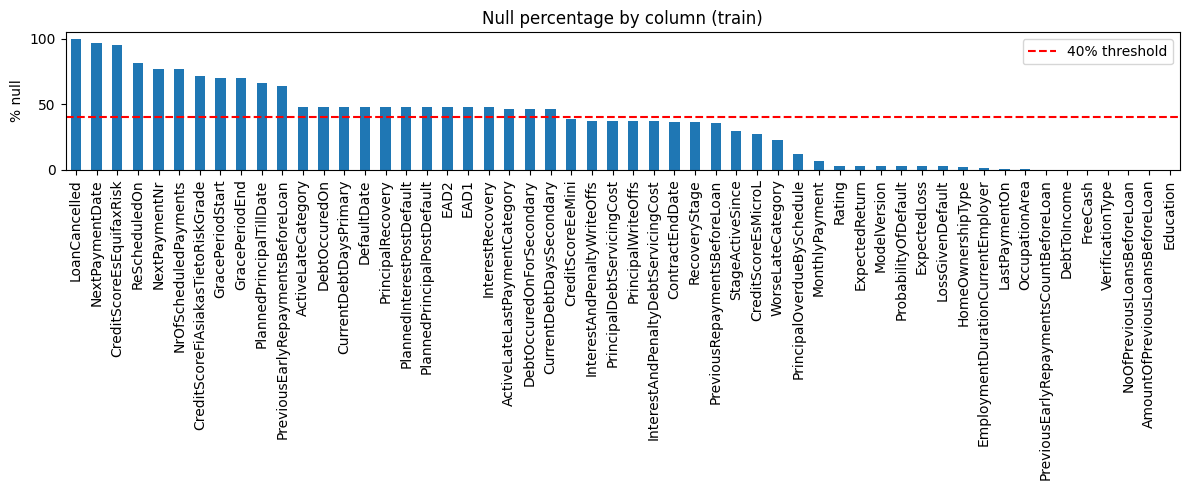


After cleaning:
Dropped 24 columns: ['LoanCancelled', 'NextPaymentDate', 'CreditScoreEsEquifaxRisk', 'ReScheduledOn', 'NextPaymentNr', 'NrOfScheduledPayments', 'CreditScoreFiAsiakasTietoRiskGrade', 'GracePeriodStart', 'GracePeriodEnd', 'PlannedPrincipalTillDate', 'PreviousEarlyRepaymentsBeforeLoan', 'ActiveLateCategory', 'DebtOccuredOn', 'CurrentDebtDaysPrimary', 'DefaultDate', 'PrincipalRecovery', 'PlannedInterestPostDefault', 'PlannedPrincipalPostDefault', 'EAD2', 'EAD1', 'InterestRecovery', 'ActiveLateLastPaymentCategory', 'DebtOccuredOnForSecondary', 'CurrentDebtDaysSecondary']
Train nulls: 0, Test nulls: 0


In [295]:
# Check nulls in training set
null_rate = X_train.isnull().mean().sort_values(ascending=False)
null_rate = null_rate[null_rate > 0]

print(f"Columns with nulls ({len(null_rate)}):")
print(null_rate.head())

# Quick plot
plt.figure(figsize=(12, 5))
null_rate.mul(100).plot(kind='bar')
plt.title("Null percentage by column (train)")
plt.ylabel("% null")
plt.axhline(40, color='r', ls='--', label='40% threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Drop or fill based on threshold
def clean_nulls(df, null_rate, thr=0.4):
    df = df.copy()
    drop = null_rate[null_rate > thr].index
    df = df.drop(columns=drop)
    for c in null_rate[null_rate <= thr].index:
        df[c] = df[c].fillna('Missing' if df[c].dtype == 'object' else df[c].median())
    return df, drop

X_train_clean, dropped = clean_nulls(X_train, null_rate)
X_test_clean = X_test.drop(columns=dropped)

# Fill remaining test nulls with train stats
for c in X_train_clean.columns:
    if X_test_clean[c].isnull().any():
        X_test_clean[c] = X_test_clean[c].fillna(
            'Missing' if X_train_clean[c].dtype == 'object' else X_train_clean[c].median()
        )

print("\nAfter cleaning:")
print(f"Dropped {len(dropped)} columns: {list(dropped)}")
print(f"Train nulls: {X_train_clean.isnull().sum().sum()}, Test nulls: {X_test_clean.isnull().sum().sum()}")


# 2.6 Outliers

In [296]:
# Numeric columns
num_cols = X_train_clean.select_dtypes(include=['number']).columns


In [297]:
# Cap outliers with IQR
def cap_iqr(df, ref, cols):
    out = df.copy()
    for c in cols:
        q1, q3 = ref[c].quantile([0.25, 0.75])
        iqr = q3 - q1
        lo, hi = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        out[c] = out[c].clip(lo, hi)
    return out

X_train_clean = cap_iqr(X_train_clean, X_train_clean, num_cols)
X_test_clean = cap_iqr(X_test_clean, X_train_clean, num_cols)


Remove ex-post features

In [298]:
# Ex-post features (post-origination info to drop)
ex_post = [
    'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade', 'PrincipalWriteOffs',
    'InterestAndPenaltyWriteOffs', 'PrincipalBalance', 'InterestAndPenaltyBalance',
    'FirstPaymentDate', 'Rating', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
    'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'RecoveryStage',
    'WorseLateCategory', 'LastPaymentOn', 'StageActiveSince', 'PlannedInterestTillDate',
    'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost', 'Restructured',
    'ActiveScheduleFirstPaymentReached', 'Status', 'Amount'
]

# Drop existing ex-post features in both sets
to_drop = list(set(ex_post) & set(X_train_clean.columns) & set(X_test_clean.columns))
X_train_clean = X_train_clean.drop(columns=to_drop, errors='ignore')
X_test_clean = X_test_clean.drop(columns=to_drop, errors='ignore')

# Check alignment
assert set(X_train_clean.columns) == set(X_test_clean.columns)

print("Train shape:", X_train_clean.shape)
print("Test shape:", X_test_clean.shape)
print(f"\nDropped {len(to_drop)} columns:")
print(sorted(to_drop))

missing = set(ex_post) - set(to_drop)
if missing:
    print("\nNot found:")
    print(sorted(missing))


Train shape: (33904, 50)
Test shape: (14531, 50)

Dropped 24 columns:
['ActiveScheduleFirstPaymentReached', 'Amount', 'ExpectedLoss', 'ExpectedReturn', 'FirstPaymentDate', 'InterestAndPenaltyBalance', 'InterestAndPenaltyDebtServicingCost', 'InterestAndPenaltyPaymentsMade', 'InterestAndPenaltyWriteOffs', 'LastPaymentOn', 'LossGivenDefault', 'PlannedInterestTillDate', 'PrincipalBalance', 'PrincipalDebtServicingCost', 'PrincipalOverdueBySchedule', 'PrincipalPaymentsMade', 'PrincipalWriteOffs', 'ProbabilityOfDefault', 'Rating', 'RecoveryStage', 'Restructured', 'StageActiveSince', 'Status', 'WorseLateCategory']


Drop unrelated features

In [299]:
# Drop non ex-post columns
drop_cols = [
    'LoanId', 'Gender', 'ListedOnUTC', 'BiddingStartedOn', 'BidsPortfolioManager',
    'BidsApi', 'BidsManual', 'LoanNumber', 'IncomeFromPrincipalEmployer',
    'IncomeFromPension', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
    'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
    'MaturityDate_Original', 'MaturityDate_Last', 'ApplicationSignedHour',
    'ApplicationSignedWeekday', 'ContractEndDate', 'MonthlyPaymentDay',
    'ModelVersion', 'LoanApplicationStartedDate', 'LoanDate'
]

for df in [X_train_clean, X_test_clean]:
    df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True, errors='ignore')

# Check alignment
assert set(X_train_clean.columns) == set(X_test_clean.columns)

print("Dropped columns:", len(drop_cols))
print("Train shape:", X_train_clean.shape)
print("Test shape:", X_test_clean.shape)


Dropped columns: 24
Train shape: (33904, 26)
Test shape: (14531, 26)


Reconverting categorical variables

In [300]:
# Set selected columns as categorical
cat_cols = ['Country', 'EmploymentDurationCurrentEmployer', 'CreditScoreEsMicroL', 'year_quarter']

for df in [X_train_clean, X_test_clean]:
    for c in cat_cols:
        if c in df.columns:
            df[c] = df[c].astype('category')

# Quick check
print("Train dtypes:\n", X_train_clean.dtypes.value_counts())
print("\nTest dtypes:\n", X_test_clean.dtypes.value_counts())


Train dtypes:
 float64     18
int64        3
bool         1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

Test dtypes:
 float64     18
int64        3
bool         1
category     1
category     1
category     1
category     1
Name: count, dtype: int64


# 3. Feature Engineering

In [301]:
X_train_clean['year_quarter'] = X_train_clean['year_quarter'].astype('category')
X_test_clean['year_quarter'] = X_test_clean['year_quarter'].astype('category')

In [302]:
# Convert selected numeric features to categorical
cat_cols = [
    'VerificationType', 'LanguageCode', 'Gender', 'Education',
    'OccupationArea', 'HomeOwnershipType', 'loan_month', 'loan_quarter',
    'is_month_end', 'NewCreditCustomer'
]

for df in [X_train_clean, X_test_clean]:
    for c in cat_cols:
        if c in df.columns:
            df[c] = df[c].astype('category')

# Quick check
print("Train categorical cols:", len(X_train_clean.select_dtypes('category').columns))
print("Test categorical cols:", len(X_test_clean.select_dtypes('category').columns))

# Check unseen categories
for c in cat_cols:
    if c in X_train_clean.columns:
        diff = set(X_test_clean[c].cat.categories) - set(X_train_clean[c].cat.categories)
        if diff:
            print(f"{c}: unseen categories in test -> {diff}")


Train categorical cols: 10
Test categorical cols: 10


Generate PaymentToIncome




In [303]:
# Payment to Income ratio
for df in [X_train_clean, X_test_clean]:
    df['PaymentToIncome'] = df['MonthlyPayment'] / df['IncomeTotal']
    df['PaymentToIncome'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['PaymentToIncome'].fillna(0, inplace=True)


/tmp/ipython-input-3893841178.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PaymentToIncome'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-3893841178.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

Generate LiabilitiesToIncome

In [304]:
# Liabilities-to-Income ratio
for df in [X_train_clean, X_test_clean]:
    df['LiabilitiesToIncome'] = df['LiabilitiesTotal'] / df['IncomeTotal']
    df['LiabilitiesToIncome'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['LiabilitiesToIncome'].fillna(0, inplace=True)


/tmp/ipython-input-3653659639.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LiabilitiesToIncome'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-3653659639.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

Generate ChildBearingAge

Create a binary feature indicating if the borrower is within childbearing age (25–40)

In [305]:
# Childbearing age flag (25–40)
for df in [X_train_clean, X_test_clean]:
    df['ChildBearingAge'] = ((df['Age'] >= 25) & (df['Age'] <= 40)).astype(int)

print("Train avg:", X_train_clean['ChildBearingAge'].mean())
print("Test avg:", X_test_clean['ChildBearingAge'].mean())


Train avg: 0.4249351109013686
Test avg: 0.4356203977702842


In [306]:
# Cap outliers using IQR
num_cols = X_train_clean.select_dtypes(include=['float64', 'int64']).columns

def cap_outliers(df, ref, cols):
    df = df.copy()
    for c in cols:
        q1, q3 = ref[c].quantile([0.25, 0.75])
        iqr = q3 - q1
        df[c] = df[c].clip(q1 - 1.5 * iqr, q3 + 1.5 * iqr)
    return df

X_train_clean = cap_outliers(X_train_clean, X_train_clean, num_cols)
X_test_clean = cap_outliers(X_test_clean, X_train_clean, num_cols)


# 4. Exploratory Data Analysis

## 4.1 Basic Statistics Overview

In [307]:
# Quick summary of numeric and categorical features
print(X_train_clean.select_dtypes(include=['float64', 'int64']).describe())
print("\nCategorical columns overview:")
print(X_train_clean.select_dtypes(include='category').describe())


                Age  AppliedAmount      Interest  LoanDuration  \
count  33904.000000   33904.000000  33904.000000  33904.000000   
mean      40.639924    2750.293794     31.109326     47.212069   
std       12.843101    2264.077737     13.103359     15.960343   
min       18.000000      31.955800      6.000000      1.000000   
25%       30.000000     830.000000     20.747500     36.000000   
50%       39.000000    2125.000000     30.470000     60.000000   
75%       50.000000    4150.000000     38.230000     60.000000   
max       77.000000    9130.000000     64.453750     60.000000   

       MonthlyPayment   IncomeTotal  ExistingLiabilities  LiabilitiesTotal  \
count    33904.000000  33904.000000         33904.000000      33904.000000   
mean       106.705494   1308.382179             2.659406        360.344555   
std         83.598303    719.929562             2.585794        376.677381   
min          0.000000      0.000000             0.000000          0.000000   
25%         35.

# 4.2 Target Variable Analysis

Default rate: 51.88%


Text(0.5, 1.0, 'Default Distribution')

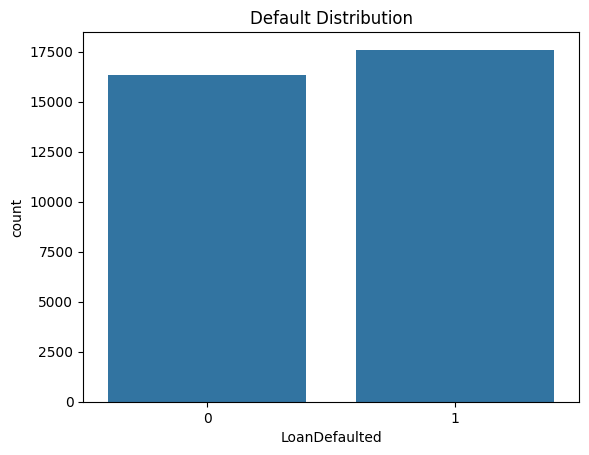

In [308]:
# Default rate analysis
print(f"Default rate: {y_train.mean():.2%}")
sns.countplot(x=y_train)
plt.title('Default Distribution')

#4.3 Key Numerical Features

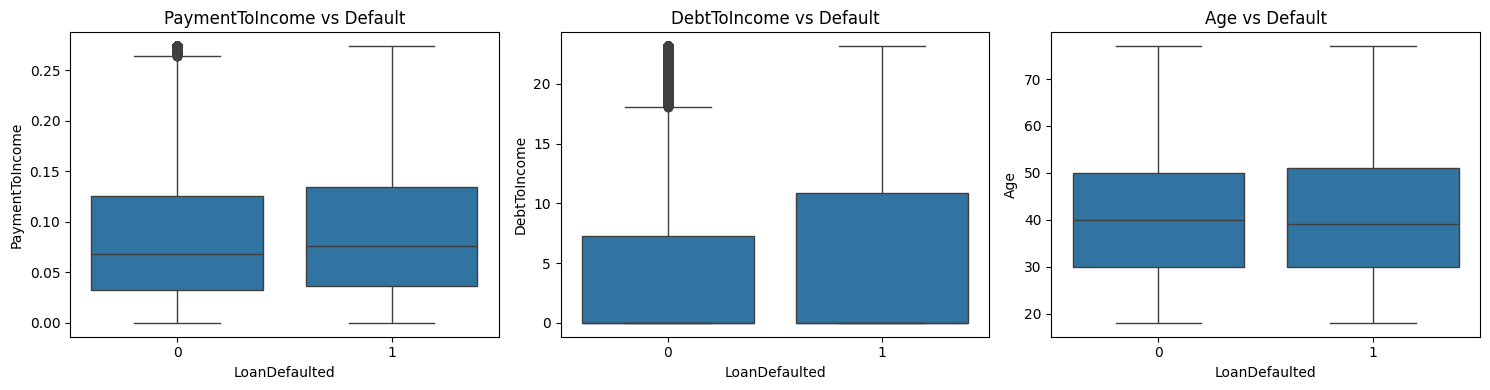

In [309]:
# Boxplots of key numeric features vs default
cols = ['PaymentToIncome', 'DebtToIncome', 'Age']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, c in enumerate(cols):
    sns.boxplot(x=y_train, y=X_train_clean[c], ax=axes[i])
    axes[i].set_title(f"{c} vs Default")
plt.tight_layout()
plt.show()


#4.4 Key Categorical Features

/tmp/ipython-input-2029000759.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(col)['LoanDefaulted'].mean().sort_values().plot.bar(figsize=(8, 4))


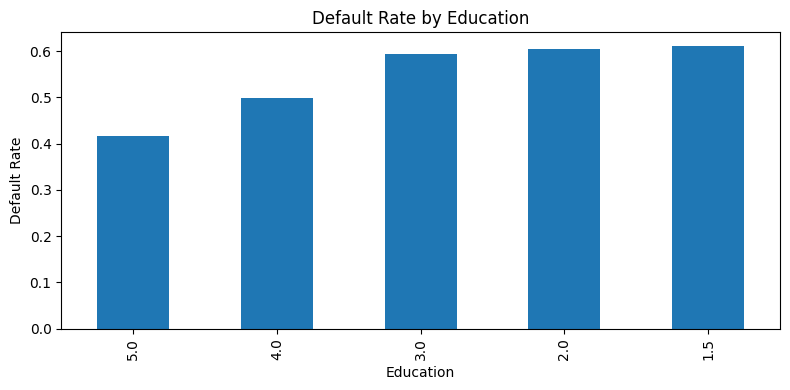

/tmp/ipython-input-2029000759.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(col)['LoanDefaulted'].mean().sort_values().plot.bar(figsize=(8, 4))


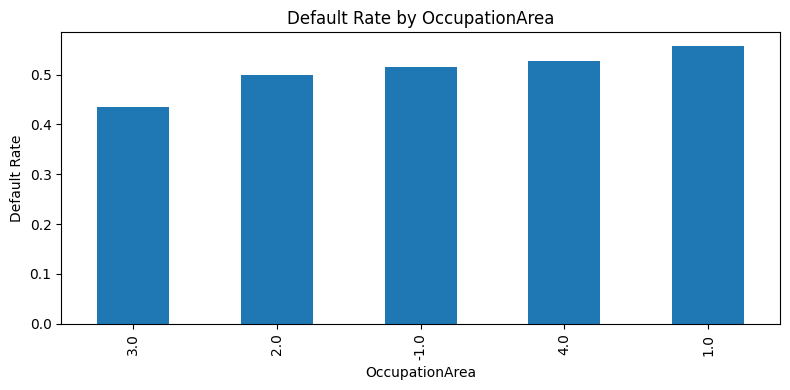

/tmp/ipython-input-2029000759.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(col)['LoanDefaulted'].mean().sort_values().plot.bar(figsize=(8, 4))


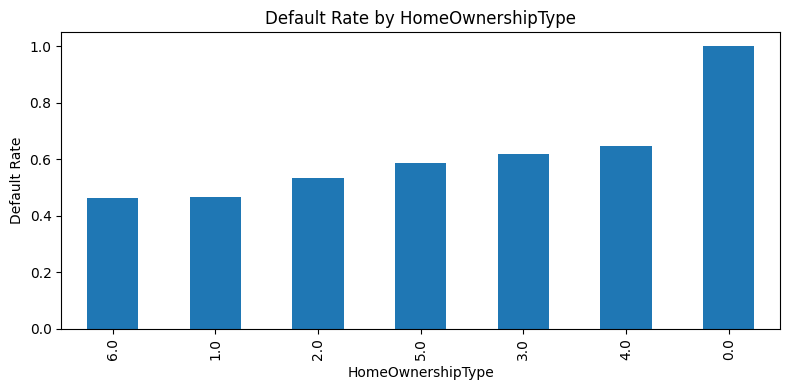

In [310]:
# Default rate by categorical feature
train_df = X_train_clean.copy()
train_df['LoanDefaulted'] = y_train

cat_cols = ['Education', 'OccupationArea', 'HomeOwnershipType']

for col in cat_cols:
    train_df.groupby(col)['LoanDefaulted'].mean().sort_values().plot.bar(figsize=(8, 4))
    plt.title(f"Default Rate by {col}")
    plt.ylabel("Default Rate")
    plt.tight_layout()
    plt.show()


# 4.5 Single Feature Correlation Heatmap

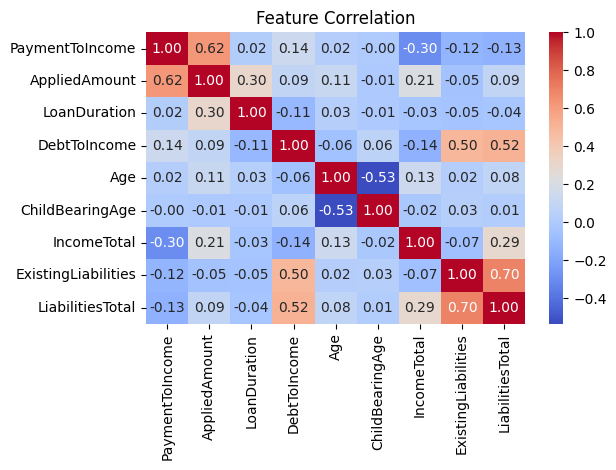

In [311]:
# Correlation heatmap of key features
top_features = [
    'PaymentToIncome', 'AppliedAmount', 'LoanDuration',
    'DebtToIncome', 'Age', 'ChildBearingAge',
    'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal'
]

sns.heatmap(X_train_clean[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation")
plt.tight_layout()
plt.show()


# 4.6 Default by Quarter

/tmp/ipython-input-3639582642.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby('year_quarter')['LoanDefaulted'].mean().plot(


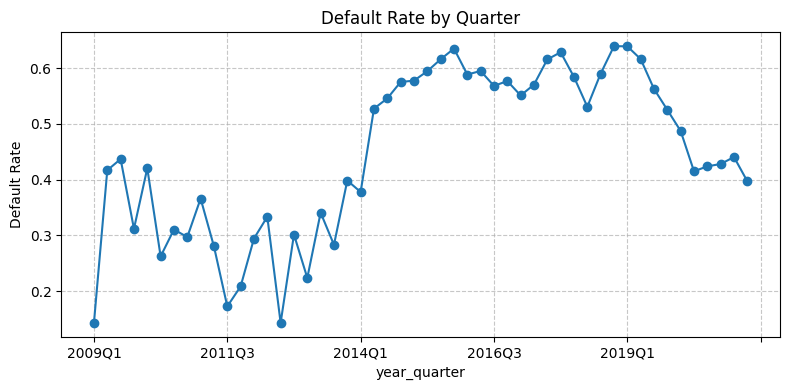

In [312]:
# Default rate trend by quarter
train_df = X_train_clean.copy()
train_df['LoanDefaulted'] = y_train

train_df.groupby('year_quarter')['LoanDefaulted'].mean().plot(
    marker='o', figsize=(8, 4), title='Default Rate by Quarter'
)
plt.ylabel('Default Rate')
plt.grid(True, ls='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 5. Modeling

# Logistic Regression

In [313]:
X_train_encoded = pd.get_dummies(X_train_clean, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_clean, drop_first=True)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [314]:
# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

log_clf = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
y_pred_cv  = cross_val_predict(log_clf, X_train_encoded, y_train, cv=5, method='predict')
y_proba_cv = cross_val_predict(log_clf, X_train_encoded, y_train, cv=5, method='predict_proba')[:, 1]


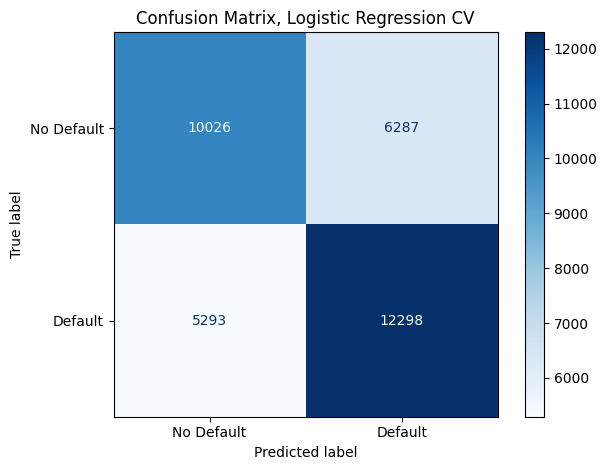

              precision    recall  f1-score   support

           0     0.6545    0.6146    0.6339     16313
           1     0.6617    0.6991    0.6799     17591

    accuracy                         0.6584     33904
   macro avg     0.6581    0.6569    0.6569     33904
weighted avg     0.6582    0.6584    0.6578     33904



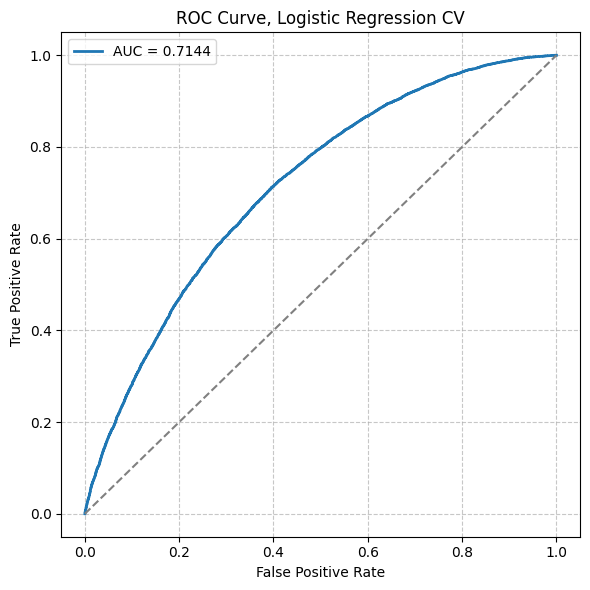

AUC Score CV: 0.7144


In [315]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve

cm = confusion_matrix(y_train, y_pred_cv)
ConfusionMatrixDisplay(cm, display_labels=['No Default', 'Default']).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix, Logistic Regression CV")
plt.tight_layout()
plt.show()

print(classification_report(y_train, y_pred_cv, digits=4))

auc_score = roc_auc_score(y_train, y_proba_cv)
fpr, tpr, _ = roc_curve(y_train, y_proba_cv)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", linewidth=2)
plt.plot([0, 1], [0, 1], ls='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve, Logistic Regression CV")
plt.legend()
plt.grid(True, ls='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"AUC Score CV: {auc_score:.4f}")


# LightGBM

The model uses tuned parameters that improve balance between precision and recall by assigning higher weight (2.5x) to the minority class.

In [316]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_predict

# Using tuned parameters from prior testing
lgb_clf = LGBMClassifier(
    objective='binary',
    learning_rate=0.01,
    n_estimators=800,
    max_depth=-1,
    num_leaves=63,
    subsample=0.6,
    colsample_bytree=0.6,
    class_weight={0: 1.0, 1: 2.5},
    random_state=42,
    n_jobs=-1
)

y_pred_lgb  = cross_val_predict(lgb_clf, X_train_encoded, y_train, cv=5, method='predict')
y_proba_lgb = cross_val_predict(lgb_clf, X_train_encoded, y_train, cv=5, method='predict_proba')[:, 1]


[LightGBM] [Info] Number of positive: 14072, number of negative: 13051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.141366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3049
[LightGBM] [Info] Number of data points in the train set: 27123, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.729406 -> initscore=0.991613
[LightGBM] [Info] Start training from score 0.991613
[LightGBM] [Info] Number of positive: 14073, number of negative: 13050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3047
[LightGBM] [Info] Number of data points in the train set: 27123, number of used features: 103
[LightGBM] [Info] 

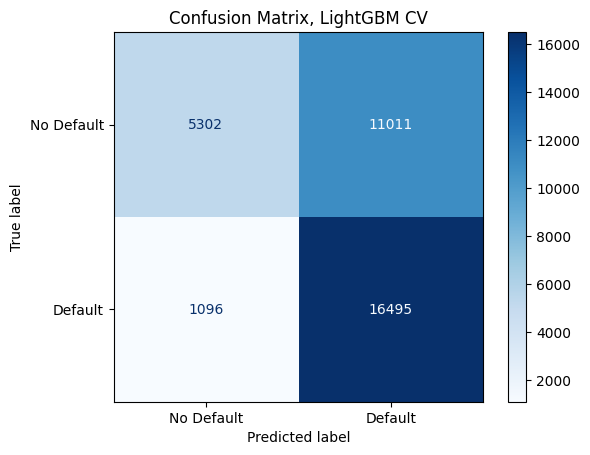

              precision    recall  f1-score   support

           0     0.8287    0.3250    0.4669     16313
           1     0.5997    0.9377    0.7315     17591

    accuracy                         0.6429     33904
   macro avg     0.7142    0.6314    0.5992     33904
weighted avg     0.7099    0.6429    0.6042     33904



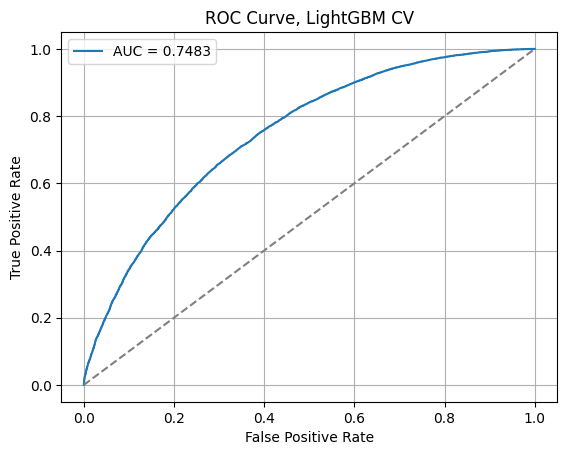

AUC Score CV: 0.7483


In [317]:
# Evaluation

cm = confusion_matrix(y_train, y_pred_lgb)
ConfusionMatrixDisplay(cm, display_labels=['No Default', 'Default']).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix, LightGBM CV")
plt.show()

print(classification_report(y_train, y_pred_lgb, digits=4))

auc_score_lgb = roc_auc_score(y_train, y_proba_lgb)
fpr, tpr, _ = roc_curve(y_train, y_proba_lgb)
plt.plot(fpr, tpr, label=f"AUC = {auc_score_lgb:.4f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve, LightGBM CV")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score CV: {auc_score_lgb:.4f}")


In [318]:
# Quick comparison
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'LightGBM'],
    'AUC_CV': [auc_score, auc_score_lgb]
})
print(results)


                 Model    AUC_CV
0  Logistic Regression  0.714427
1             LightGBM  0.748337
